Практична робота №6

Баш Анастасія
МІТ-31

In [15]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression 

Завдання:

1. Створіть власний набір даних для регресії.

In [16]:
X, y = make_regression(n_samples=1000, n_features=7, n_informative=3, noise=13, random_state=3)
dat = pd.DataFrame(X, columns=['Feature {i+1}' for i in range(7)])
dat['Target'] = y
dat.to_csv('regression_data.csv', index=False)

# Стандартизуйте дані
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Розділіть дані на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

2. Спробуйте побудувати нейронну мережу з трьома повнозв'язними шарами (Dense layers) та навчити її на вашому власному наборі даних для регресії (200 епох). Оцініть її ефективність.

In [8]:
# Побудова та компіляція базової моделі
model_base = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_base.compile(optimizer='adam', loss='mean_squared_error')

# Навчання базової моделі
history_base = model_base.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))
pred = model_base.predict(X_test)

Epoch 1/200
25/25 [==============================] - 0s 7ms/step - loss: 0.7837 - val_loss: 0.4530
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 0.2443 - val_loss: 0.0980
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0640 - val_loss: 0.0544
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0426 - val_loss: 0.0376
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0304 - val_loss: 0.0290
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0239 - val_loss: 0.0253
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0211 - val_loss: 0.0240
Epoch 8/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0192 - val_loss: 0.0221
Epoch 9/200
25/25 [==============================] - 0s 1ms/step - loss: 0.0181 - val_loss: 0.0224
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0169 - val_loss: 0.0207
Epoch 11/

In [7]:
print("Loss on training data:\n", model_base.evaluate(X_train, y_train, verbose=0))
print("Loss on test data:\n", model_base.evaluate(X_test, y_test, verbose=0))

Loss on training data:
 0.0023496372159570456
Loss on test data:
 0.024700894951820374


<Figure size 1200x900 with 0 Axes>

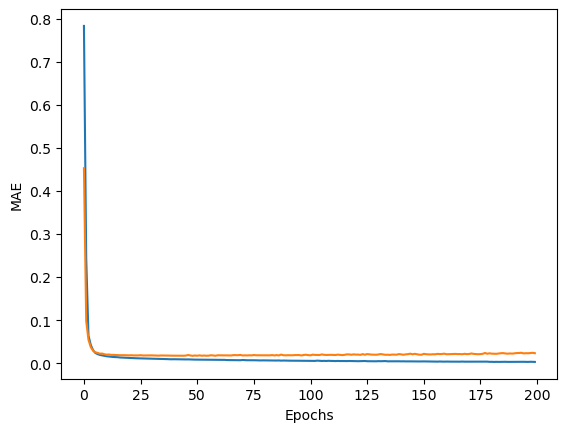

<Figure size 1200x900 with 0 Axes>

In [17]:
plt.plot(history_base.history['loss'], label='Train loss')
plt.plot(history_base.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.figure(figsize=(12, 9))

3. Спробуйте покращити результати, використовуючи такі підходи


In [11]:
model_enhanced = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Компіляція та навчання покращеної моделі
model_enhanced.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')
history_enhanced = model_enhanced.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2023 - val_loss: 0.0591
Epoch 2/300
25/25 [==============================] - 0s 1ms/step - loss: 0.0315 - val_loss: 0.0204
Epoch 3/300
25/25 [==============================] - 0s 1ms/step - loss: 0.0174 - val_loss: 0.0237
Epoch 4/300
25/25 [==============================] - 0s 1ms/step - loss: 0.0157 - val_loss: 0.0213
Epoch 5/300
25/25 [==============================] - 0s 1ms/step - loss: 0.0136 - val_loss: 0.0199
Epoch 6/300
25/25 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0192
Epoch 7/300
25/25 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.0211
Epoch 8/300
25/25 [==============================] - 0s 2ms/step - loss: 0.0188 - val_loss: 0.0435
Epoch 9/300
25/25 [==============================] - 0s 2ms/step - loss: 0.0169 - val_loss: 0.0290
Epoch 10/300
25/25 [==============================] - 0s 2ms/step - loss: 0.0164 - val_loss: 0.0212
Epoch 11/

4. Знайдіть відповідний код та побудуйте графік зміни функції втрат на тренувальному та тестувальному наборі даних під час тренування останньої моделі.

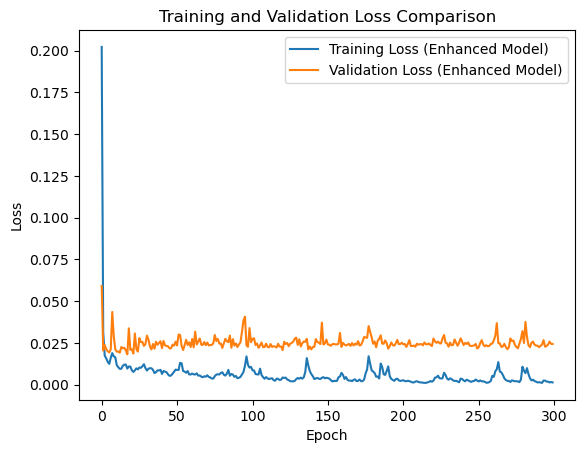

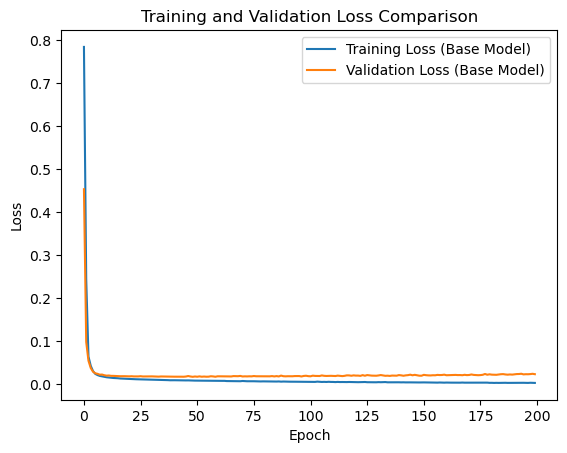

In [14]:
# Візуалізація функцій втрат
plt.plot(history_enhanced.history['loss'], label='Training Loss (Enhanced Model)')
plt.plot(history_enhanced.history['val_loss'], label='Validation Loss (Enhanced Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Comparison')
plt.legend()
plt.show()

plt.plot(history_base.history['loss'], label='Training Loss (Base Model)')
plt.plot(history_base.history['val_loss'], label='Validation Loss (Base Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Comparison')
plt.legend()
plt.show()